#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1 + Z_2 + Z_3 + Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.


### Answer
Given that $\Sigma = I_9$, we know that $Z_1,..., Z_9$ are mutually independent (since uncorrelatedness implies independence for normal RVs). 

To prove that $Z_1 + Z_2 + Z_3 + Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$ we need to prove that $Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 0$. <br>

I'll define 
$$
Y = [Z_1 + Z_2 + Z_3 + Z_4, Z_1 + Z_2 - Z_3 - Z_4 - Z_5]^T \sim \Ncal([\mu_1 + \mu_2 + \mu_3 + \mu_4, \mu_1 + \mu_2 - \mu_3 - \mu_4 - \mu_5]^T, \Sigma)
$$

Where
$$
\Sigma = \begin{bmatrix} 1 & Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) \\
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5)^T & 1
\end{bmatrix} 
$$


Looking at 
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5)$$ 
we can say that:
$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = Cov(Z_1, Z_1) + Cov(Z_1, Z_2) -Cov(Z_1, Z_3) - Cov(Z_1, Z_4) - Cov(Z_1, Z_5) + Cov(Z_2, Z_1) + Cov(Z_2, Z_2) -Cov(Z_2, Z_3) - Cov(Z_2, Z_4) - Cov(Z_2, Z_5) + Cov(Z_3, Z_1) + Cov(Z_3, Z_2) -Cov(Z_3, Z_3) - Cov(Z_3, Z_4) - Cov(Z_3, Z_5) + Cov(Z_4, Z_1) + Cov(Z_4, Z_2) -Cov(Z_4, Z_3) - Cov(Z_4, Z_4) - Cov(Z_4, Z_5) 
$$

And since $Cov(Z_i, Z_i) = Var(Z_i)$, we can plug in what we already know from the fact that the variance-covariance matrix is the identity matrix and get:

$$
Cov(Z_1 + Z_2 + Z_3 + Z_4,Z_1 + Z_2 - Z_3 - Z_4 - Z_5) = 1 + 0 - 0 - 0 - 0 +0 + 1 - 0 - 0 - 0 + 0 + 0 - 1 - 0 - 0 + 0 + 0 + 0 - 1 - 0 = 0
$$

Hence, $\Sigma$ that was defined above actually equals 
$$
\Sigma = \begin{bmatrix} 1 & 0 \\
0 & 1
\end{bmatrix} 
$$

And the two variables are independent

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

### Answer

As we saw in the lecture, given non-random matrices $A$, $B$, we get that $Cov(AX, BY) = A Cov(X,Y) B^T$. <br>
In our case, $Cov(X,Y) = Cov(AZ, BZ) = A Cov(Z,Z) B^T = A Var(Z) B^T$ and since we'd like to find coditions for which $X$, $Y$ are independent, we'll solve $Cov(X,Y) = 0$
$$ Cov(X,Y) = 0 $$
$$A Var(Z) B^T = 0 $$

For this to occur, the following need to happen:
1. $A, B \in \reals^{n \times n} $
2. $A Var(Z) = 0$ OR $Var(Z) B^T = 0$

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?


### Answer
I'll answer that in a similar fashion to the first section:

* When calculating $cov(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j})$, we will necessarily iterate over the same $Z_{i}{j}$ several times. Meaning, the same iid normal RVs constitute both $\bar{Z}_{i\bullet}$, and $\bar{Z}_{\bullet j}$. When this is the case, there is no way that their covariance will be 0 and that they will be independent.
* When calculuating $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet})$, we see that we are iterating over completely different RVs. Since it is given that the RVs $Z_{i}{j}$ are Independent and identically distributed, we know that the two distinct RVs are indepedent. Hence, $cov(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = 0$ and the variables are independent
* $cov(\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = cov(\bar{Z}_{i\bullet}, \bar{Z}_{i\bullet}) - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}) = 1 - cov(\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet})$. Since $\bar{Z}_{\bullet \bullet}, \bar{Z}_{i\bullet}$ share $J$ normal RVs, we know that their covariance is $\geq 1$ , hence the variables aren't independent.

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 


In [64]:
import numpy as np
import seaborn as sns

In [ ]:
pool = np.random.randn(1_000_000)
batch_0, batch_1 = list(np.random.randn(10)), list(np.random.randn(10))
for iteration in range(1_000_000):
    i = np.random.choice(pool)
    j = np.random.choice(pool)
#     print(np.cov(batch_0, batch_1))
    if len(batch_0) == 1_000:
        print(iteration)
        print(np.cov(batch_0, batch_1))
    new_batch_0, new_batch_1 = batch_0, batch_1
    new_batch_0.append(i)
    new_batch_1.append(j)
#         print(batch_0)
    cov = np.cov(batch_0, batch_1)[0][1]
    new_cov = np.cov(new_batch_0, new_batch_1)[0][1]
#         print(f"new cov {new_cov}, old cov {cov}")
    if (cov < 0.25 and round(new_cov, 5) > round(cov, 5)) or (round(cov, 2) == round(new_cov, 2) == 0.25):
        batch_0.append(i)
        batch_1.append(j)
#         print(cov, new_cov)


In [89]:
np.random.randint(0, 26*1000)

19682

In [ ]:
pool = np.random.randn(1_000_000)
TARGET = 0.25
batch_0, batch_1 = list(np.random.choice(pool,1000)), list(np.random.choice(pool,1000))
batch_cov = np.cov(batch_0, batch_1)[0][1]
while abs(TARGET - batch_cov) > 0.01:
    index = 0
    new_batch_1 = batch_1
    new_batch_1[index] = np.random.choice(pool)
    new_cov = np.cov(batch_0, new_batch_1)[0][1]
    if abs(TARGET - new_cov) >= abs(TARGET - batch_cov):
        batch_1 = new_batch_1
        batch_cov = np.cov(batch_0, batch_1)[0][1]
    index += 1
    
    if index % 100 == 0:
        print(f"i is {i}, cov is {batch_cov}")


In [86]:
MAX_ITER = 100000000
print_freq = 100  # iterations

# question 4
def create_samples_multivariate(wanted_cov=0.25, size=1000):
    samples_normal = np.random.normal(loc=0, scale=1, size=size*1000)
    
    permute_half = np.random.permutation(size)
    Z1 = samples_normal[permute_half]
    
    permute_half = np.random.permutation(size)
    Z2 = list(samples_normal[permute_half])
    
    sample_cov = np.cov(Z1, np.array(Z2))[0][1]
    index_to_replace = 0
    for i in range(MAX_ITER):        
        temp_sample = samples_normal[np.random.randint(0, size*1000)]
        temp_Z2 = Z2.copy()
        temp_Z2[index_to_replace] = temp_sample
        temp_Z2 = np.array(temp_Z2)
        temp_sample_cov = np.cov(Z1, temp_Z2)[0][1]
        
            
        if (temp_sample_cov > sample_cov and sample_cov < wanted_cov) or (temp_sample_cov < sample_cov and sample_cov > wanted_cov):
            index_to_replace += 1
            Z2 = temp_Z2
            sample_cov = temp_sample_cov
            
        if wanted_cov - 0.002 <= sample_cov <= wanted_cov + 0.002:
            print(f"\n\nFinished at iteration: {i}, with cov={sample_cov}")
            break
        
        if i % print_freq == 0:
            print(f"Iteration={i}, Cov={sample_cov}")
            
    return Z1, Z2, sample_cov
                  
Z1, Z2, cov = create_samples_multivariate()  

0.7041819432139139
Iteration=0, Cov=0.009298031630476964
0.435390236333805
0.8288547172215155
0.6148502129329084
0.0008442065288846761
0.06058421845407539
1.1945124053007727
-0.7734705034226109
0.18328132468423633
0.15496376734453293
-0.26092452653392634
0.18015361816329267
0.5620456282723986
-0.8815742918208039
-0.6405503078862704
1.0949014438737232
0.18902905180061788
-0.8548467591164204
-0.8341057929984045
-0.7139924767772361
0.11648473933661667
0.018221769989772502
0.502097070229565
0.13570813485955602
-0.762715155790029
0.1548429372035754
0.7388633522875342
0.27448429038490196
-2.235287505074489
0.618953157255807
1.6440699668186562
-0.2896141175165372
0.4707237805806918
0.052352317828247
0.8357611620302424
0.28052271689919106
-1.494606671222895
0.034283378921428964
0.22132852795196067
0.3029904813747775
-0.18354198183269194
-0.8048529982673879
1.6755029959344307
0.5570480093610843
-0.0793095739278675
-1.4842137587079156
-0.8207980689785872
-0.6224127606165372
2.2781743540398263
-0

In [49]:
batch_0, batch_1 = list(np.random.randn(10)), list(np.random.randn(10))
cov = np.cov(batch_0, batch_1) 
print(cov)
print(cov[0][1])

[[0.44698808 0.33558542]
 [0.33558542 1.36254977]]
0.3355854156232687


<AxesSubplot:ylabel='Count'>

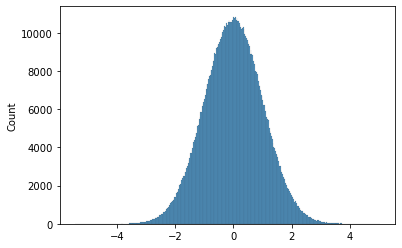

In [80]:
sns.histplot(pool)

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


### Answer

In [61]:
from scipy.integrate import dblquad
import math

In [ ]:
def pdf_func(m, Sigma, y, mu): 
    term = 1/((2*math.pi)^math.sqrt(np.linalg.det(Sigma)))
    exp = np.e^(-1/2*(y-mu).T*np.linalg.inv(Sigma)*(y-mu))
    return term*exp

Sig = np.array([[1, 0.25]
                 [0.25, 1]])
pdf = lambda y1, y2: (1/((2*math.pi)^math.sqrt(np.linalg.det(Sigma)))) * np.e^(-1/2*(y-mu).T*np.linalg.inv(Sigma)*(-mu))
pdf = pdf_func(m=2, Sigma=Sig, mu=0)
dblquad()

## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [20]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [21]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>